In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


### Undestanding the data

In [29]:
path = '/Users/PC/Desktop/Deadline/'
airbnb = pd.read_csv(path + 'listings.csv')
airbnb.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45305964,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,NaN,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,NaN,1,365,0,NaN
1,8975471,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,NaN,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,NaN,1,362,0,NaN
2,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,2020-01-06,0.51,2,362,0,NaN
3,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1405,1,0,NaN,NaN,2,358,0,NaN
4,31508092,Room for rent good and cheap,223483764,Huangseng,NaN,Bang Na,13.66075,100.57991,Private room,700,1,0,NaN,NaN,1,365,0,NaN
5,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0,NaN


In [30]:
#checking amount of rows
len(airbnb)

16640

In [31]:
#checking amount of columns
len(airbnb.columns)

18

In [32]:
#checking datatype of each column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [33]:
#showing how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                  9
host_id                               0
host_name                             0
neighbourhood_group               16640
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6573
reviews_per_month                  6573
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           16640
dtype: int64

### Cleaning the "Unclean" Data

In [34]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id', 'last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,NaN,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,1,365,0,NaN
1,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,NaN,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,1,362,0,NaN
2,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,0.51,2,362,0,NaN


In [35]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month': 0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()


0

### Undestanding the data

In [36]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

50

In [37]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
airbnb.neighbourhood.unique()


array(['Bang Sue', 'Don Mueang', 'Ratchathewi', 'Bang Na', 'Bang Kapi',
       'Pra Wet', 'Lat Krabang', 'Suanluang', 'Din Daeng', 'Rat Burana',
       'Bang Rak', 'Sathon', 'Phaya Thai', 'Chatu Chak', 'Khlong Toei',
       'Vadhana', 'Huai Khwang', 'Nong Chok', 'Phra Khanong', 'Lak Si',
       'Khlong San', 'Yan na wa', 'Bang Kho laen', 'Bang Khen',
       'Thon buri', 'Sai Mai', 'Parthum Wan', 'Saphan Sung',
       'Samphanthawong', 'Min Buri', 'Bangkok Yai', 'Phasi Charoen',
       'Phra Nakhon', 'Wang Thong Lang', 'Dusit', 'Bueng Kum',
       'Bang Phlat', 'Chom Thong', 'Khan Na Yao', 'Khlong Sam Wa',
       'Lat Phrao', 'Bangkok Noi', 'Nong Khaem', 'Pom Prap Sattru Phai',
       'Thawi Watthana', 'Bang Khae', 'Thung khru', 'Bang Khun thain',
       'Taling Chan', 'Bang Bon'], dtype=object)

In [38]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### Exploring and Visualizing Data

In [39]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host_id = airbnb.host_id.value_counts().head(10)
top_host_id

201677068    207
52161947      91
26736483      84
187786849     69
68154488      62
228535635     62
342113311     57
62257044      55
270442733     52
8444643       52
Name: host_id, dtype: int64

In [40]:
#let's see what hosts (Names) have the most listings on Airbnb platform and taking advantage of this service
top_host = airbnb.host_name.value_counts().head(10)
top_host

Curry       207
Noons        91
K            86
Pornchai     74
Gravity      69
Bee          65
Alex         64
Dusadee      62
Zuzu         59
George       58
Name: host_name, dtype: int64

In [41]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

207

In [49]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('white')

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index': 'host_name',
                   'host_name': 'P_Count'}, inplace=True)
top_host_df

,host_name,P_Count
0,Curry,207
1,Noons,91
2,K,86
3,Pornchai,74
4,Gravity,69
5,Bee,65
6,Alex,64
7,Dusadee,62
8,Zuzu,59
9,George,58


[Text(0, 0, 'Curry'),
 Text(1, 0, 'Noons'),
 Text(2, 0, 'K'),
 Text(3, 0, 'Pornchai'),
 Text(4, 0, 'Gravity'),
 Text(5, 0, 'Bee'),
 Text(6, 0, 'Alex'),
 Text(7, 0, 'Dusadee'),
 Text(8, 0, 'Zuzu'),
 Text(9, 0, 'George')]

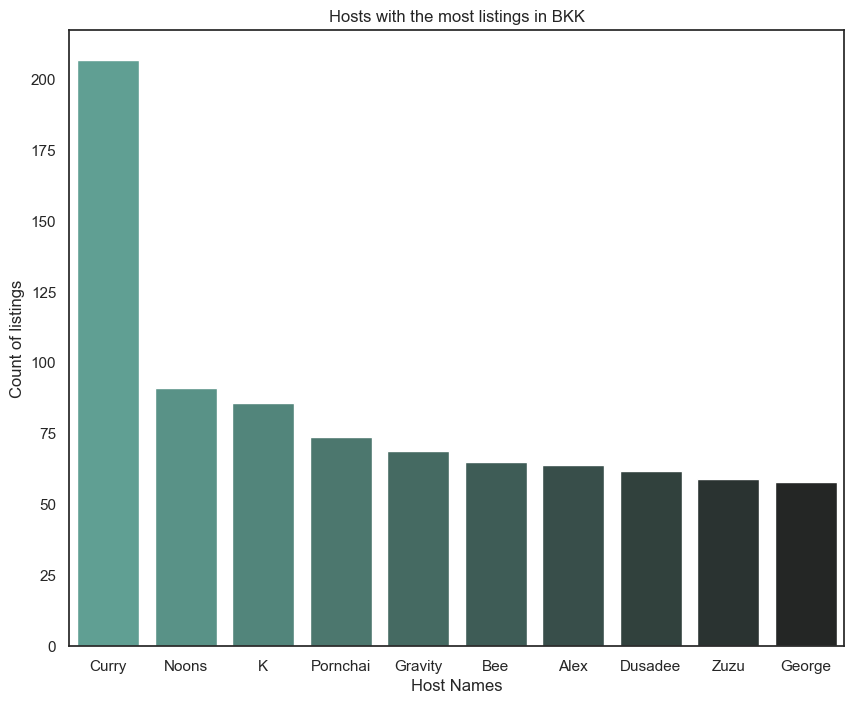

In [43]:
viz_1 = sns.barplot(x="host_name", y="P_Count",
                    data=top_host_df, palette='dark:#5A9_r')
viz_1.set_title('Hosts with the most listings in BKK')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host Names')
viz_1.set_xticklabels(viz_1.get_xticklabels())


#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

In [44]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)


Khlong Toei     2101
Vadhana         2093
Ratchathewi     1082
Huai Khwang     1079
Bang Rak         835
Sathon           754
Bang Na          686
Phra Nakhon      592
Phra Khanong     575
Chatu Chak       541
Name: neighbourhood, dtype: int64

In [45]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]

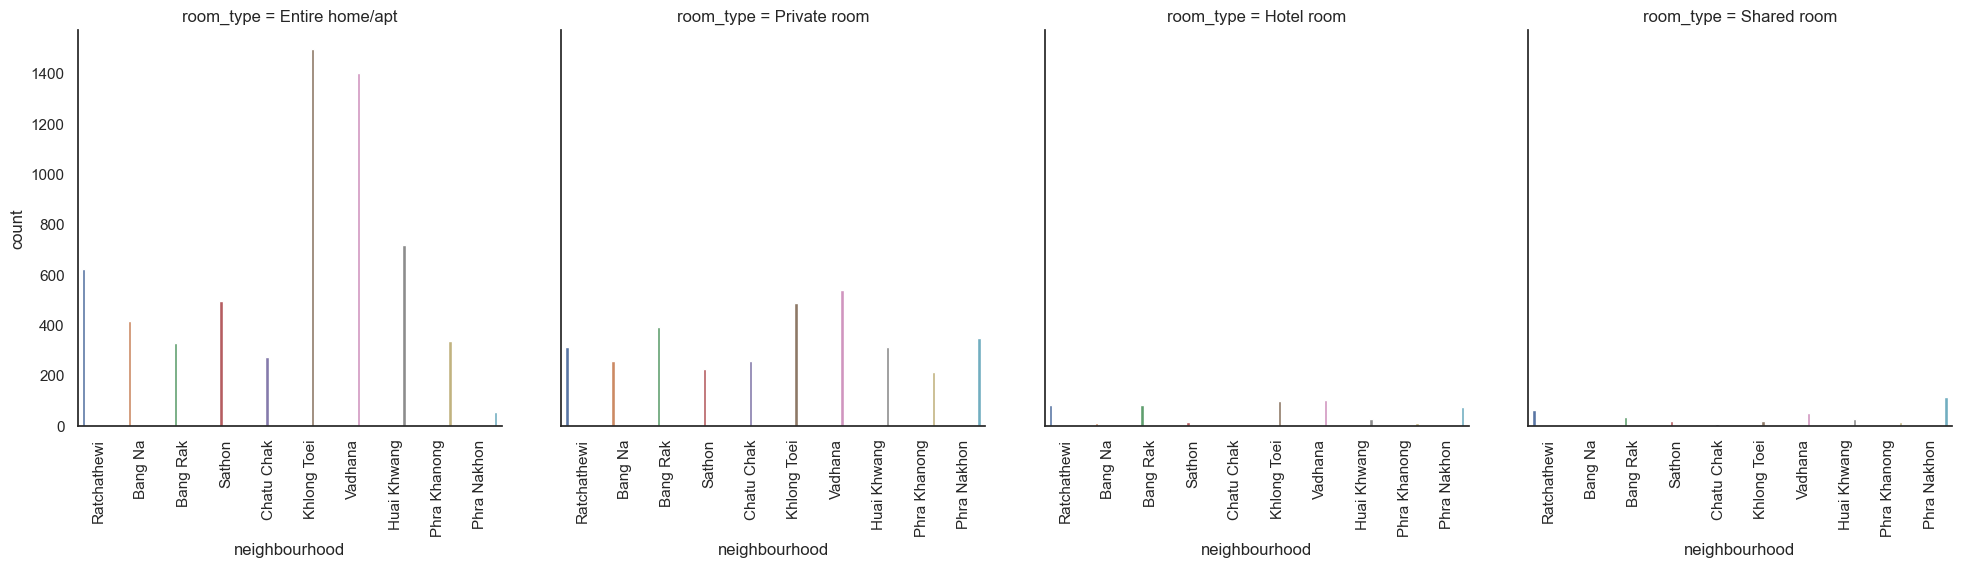

In [46]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Khlong Toei', 'Vadhana', 'Ratchathewi', 'Huai Khwang',
                                                 'Bang Rak', 'Sathon', 'Bang Na', 'Phra Nakhon', 'Phra Khanong', 'Chatu Chak'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood',
                    col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)


TypeError: unhashable type: 'LinearSegmentedColormap'

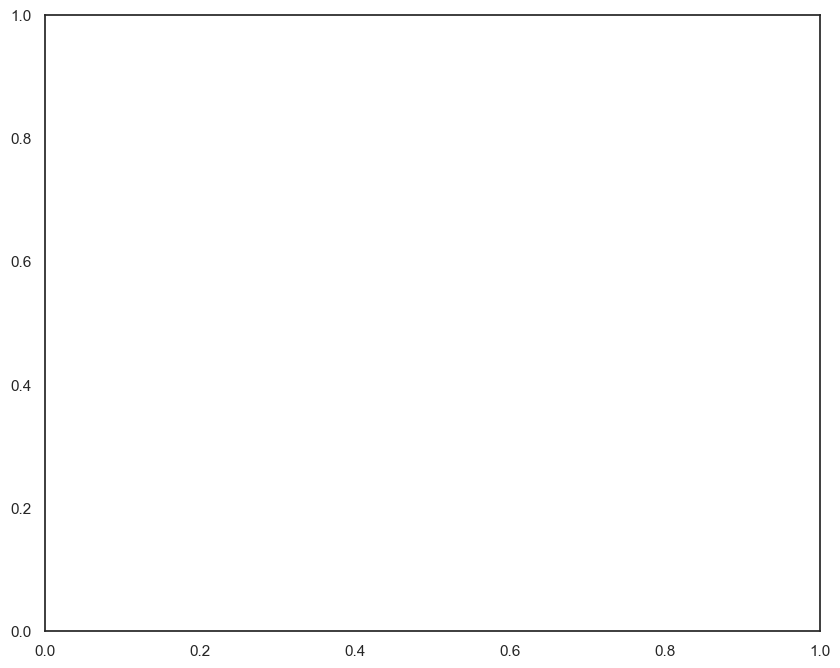

In [47]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out
viz_4 = sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                   cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))
viz_4.legend()
